___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8


#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [137]:
!pip install Apyori


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [91]:
!pip install yellowbrick


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from apyori import apriori

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [139]:
data = pd.read_csv('groceries.csv')

In [140]:
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
data.shape #розмір датасету

(9835, 33)

In [141]:
# Кількість транзакцій по кількості продуктів у транзакції
data['Item(s)'].value_counts()

1 2159
2 1643
3 1299
4 1005
5 855
6 645
7 545
8 438
9 350
10 246
11 182
12 117
13 78
14 77
15 55
16 46
17 29
19 14
18 14
21 11
20 9
23 6
22 4
29 3
26 1
32 1
27 1
28 1
24 1
Name: Item(s), dtype: int64

In [142]:
data.columns #назви усіх стовпців 

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')

In [143]:
data['ItemDescription'] = data.apply(lambda row: ', '.join([x for x in row[
['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
 'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
 'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
 'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
 'Item 31', 'Item 32']] if str(x) != 'nan']), axis=1)

data = data.drop(['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
                  'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
                  'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
                  'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
                  'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
                  'Item 31', 'Item 32'], axis=1)

In [144]:
data.info

<bound method DataFrame.info of       Item(s)                                    ItemDescription
0           4  citrus fruit, semi-finished bread, margarine, ...
1           3                     tropical fruit, yogurt, coffee
2           1                                         whole milk
3           4      pip fruit, yogurt, cream cheese, meat spreads
4           4  other vegetables, whole milk, condensed milk, ...
...       ...                                                ...
9830       17  sausage, chicken, beef, hamburger meat, citrus...
9831        1                                  cooking chocolate
9832       10  chicken, citrus fruit, other vegetables, butte...
9833        4  semi-finished bread, bottled water, soda, bott...
9834        5  chicken, tropical fruit, other vegetables, vin...

[9835 rows x 2 columns]>

In [145]:
transactions = []
for i in range(0, 9835):
     transactions.append(data['ItemDescription'][i].split(', '))

transactions[:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

In [146]:
rules = apriori(transactions = transactions, min_support = 0.001, min_confidence = 0.1, min_lift = 0.5, min_length = 2, max_length = 2)

results = tuple(rules)
results

(RelationRecord(items=frozenset({'bottled water'}), support=0.11052364006100661, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.11052364006100661, lift=1.0)]),
 RelationRecord(items=frozenset({'other vegetables'}), support=0.1934926283680732, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'other vegetables'}), confidence=0.1934926283680732, lift=1.0)]),
 RelationRecord(items=frozenset({'rolls/buns'}), support=0.18393492628368074, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'rolls/buns'}), confidence=0.18393492628368074, lift=1.0)]),
 RelationRecord(items=frozenset({'root vegetables'}), support=0.10899847483477376, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'root vegetables'}), confidence=0.10899847483477376, lift=1.0)]),
 RelationRecord(items=frozenset({'soda'}), support=0.17437722419928825, ordered_statistics

In [147]:
# Зберігаємо наші результати в датафрейм

resultsinDataFrame = pd.DataFrame(results, columns=['Items', 'Support', 'Statistics'])

resultsinDataFrame['Left Hand Side'] = resultsinDataFrame['Statistics'].apply(lambda x: list(x[0][0]))
resultsinDataFrame['Right Hand Side'] = resultsinDataFrame['Statistics'].apply(lambda x: list(x[0][1]))
resultsinDataFrame['Confidence'] = resultsinDataFrame['Statistics'].apply(lambda x: x[0][2])
resultsinDataFrame['Lift'] = resultsinDataFrame['Statistics'].apply(lambda x: x[0][3])

resultsinDataFrame = resultsinDataFrame[['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift']]

In [148]:
# Переглядаємо наші результати
resultsinDataFrame.head(10)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,[],[bottled water],0.110524,0.110524,1.000000
1,[],[other vegetables],0.193493,0.193493,1.000000
2,[],[rolls/buns],0.183935,0.183935,1.000000
3,[],[root vegetables],0.108998,0.108998,1.000000
4,[],[soda],0.174377,0.174377,1.000000
5,[],[tropical fruit],0.104931,0.104931,1.000000
6,[],[whole milk],0.255516,0.255516,1.000000
7,[],[yogurt],0.139502,0.139502,1.000000
8,[Instant food products],[bottled water],0.001017,0.126582,1.145296
9,[Instant food products],[butter],0.001220,0.151899,2.741145


In [149]:
# Виводимо топ-3 продукти, що продаються, тобто ті для яких Support буде найбільшим

products_by_selling = resultsinDataFrame.sort_values(by = ['Support'], ascending = False)

products_by_selling['Right Hand Side'][:3]

6 [whole milk]
1 [other vegetables]
2 [rolls/buns]
Name: Right Hand Side, dtype: object

In [150]:
# Виводимо топ-2 пари продуктів, що продаються

pairs = resultsinDataFrame[resultsinDataFrame['Lift'] > 1]
top_pairs = pairs.sort_values(by='Lift', ascending=False)
top_pairs.head(2)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
1366,[mayonnaise],[mustard],0.001423,0.155556,12.965160
14,[Instant food products],[hamburger meat],0.003050,0.379747,11.421438


### *Як отриману інформацію можна використати?*

Інформацію про продукти які продаються найчастіше ми можемо використовувати при планування закупівлі, купувати у постачальників такі продукти в більшому обсязі чи частіше, щоб вони були постійно присутні в асортименті.

При викладці товарів на полиці чи плануванні розташування відділів у магазині. Наприклад, якщо складати майонез і гірчицю разом на полиці, або розташовувати біля відділу мясного відділу прилавок з продуктами швидкого приготування (оскільки у нас з ними часто купують мясо для гарбургерів)

Також цю інформацію можна використовувати для плануванні маркетингових акцій та створенні рекламних листівок з акціями тижня

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

#### *1. Опис данних*

In [151]:
df = pd.read_csv('Mall_Customers.csv')

In [152]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [153]:
# Перевірка та обробка відсутніх значень у даних

df.isnull().sum()

CustomerID 0
Gender 0
Age 0
Annual Income (k$) 0
Spending Score (1-100) 0
dtype: int64

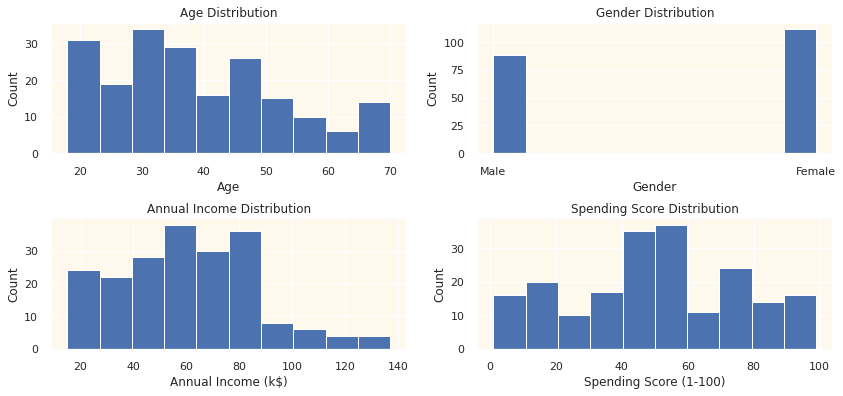

In [154]:
# Графіки розподілу ознак у нашому датасеті

fig, axs = plt.subplots(2, 2, figsize=(14,6))
fig.set_facecolor('white')

axs[0][0].hist(df['Age'])
axs[0][0].set_title('Age Distribution')
axs[0][0].set_xlabel('Age')
axs[0][0].set_ylabel('Count')

axs[0][1].hist(df['Gender'])
axs[0][1].set_title('Gender Distribution')
axs[0][1].set_xlabel('Gender')
axs[0][1].set_ylabel('Count')

axs[1][0].hist(df['Annual Income (k$)'])
axs[1][0].set_title('Annual Income Distribution')
axs[1][0].set_xlabel('Annual Income (k$)')
axs[1][0].set_ylabel('Count')

axs[1][1].hist(df['Spending Score (1-100)'])
axs[1][1].set_title('Spending Score Distribution')
axs[1][1].set_xlabel('Spending Score (1-100)')
axs[1][1].set_ylabel('Count')

plt.subplots_adjust(hspace=0.5)

In [155]:
# Виводимо описову статистику
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

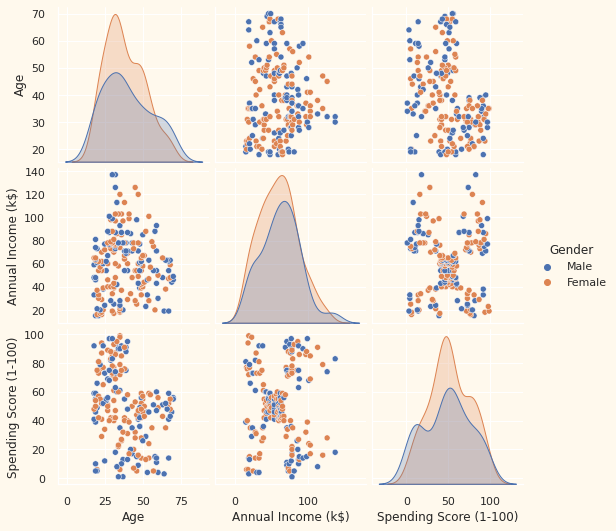

In [156]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

To_Plot = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print("Reletive Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(df[To_Plot], hue= 'Gender')

plt.show()

#### *2. Обробка данних*

In [157]:
# Кодування категоріальних змінних 

df['Gender'] = LabelEncoder().fit_transform(df['Gender']) #1 - Male, 0 - Female
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [158]:
# Створюємо копію датафреуму
data = df.copy()
# Видаляємо стовпець з зайвими данними
data = data.drop(columns=['CustomerID'], axis=1)

In [159]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [160]:
# Масштабуємо данні
scalet_data = StandardScaler().fit_transform(data)
scalet_data

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
 [ 1.12815215, -1.28103541, -1.73899919, 1.19570407],
 [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
 [-0.88640526, -1.13750203, -1.70082976, 1.04041783],
 [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
 [-0.88640526, -1.20926872, -1.66266033, 1.00159627],
 [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
 [-0.88640526, -1.13750203, -1.62449091, 1.70038436],
 [ 1.12815215, 1.80493225, -1.58632148, -1.83237767],
 [-0.88640526, -0.6351352 , -1.58632148, 0.84631002],
 [ 1.12815215, 2.02023231, -1.58632148, -1.4053405 ],
 [-0.88640526, -0.27630176, -1.58632148, 1.89449216],
 [-0.88640526, 1.37433211, -1.54815205, -1.36651894],
 [-0.88640526, -1.06573534, -1.54815205, 1.04041783],
 [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
 [ 1.12815215, -1.20926872, -1.54815205, 1.11806095],
 [-0.88640526, -0.27630176, -1.50998262, -0.59008772],
 [ 1.12815215, -1.3528021 , -1.50998262, 0.61338066],
 [ 1.12815215, 0.94373197, -1.43364376, -0.82301709],
 [-0.88640526, -0.27630176, -1.43364376, 1.8556706 ],
 [ 1.12815215, -0.27630176, -1.39547433, -0.59008772],
 [ 1.12815215, -0.99396865, -1.39547433, 0.88513158],
 [-0.88640526, 0.51313183, -1.3573049 , -1.75473454],
 [ 1.12815215, -0.56336851, -1.3573049 , 0.88513158],
 [-0.88640526, 1.08726535, -1.24279661, -1.4053405 ],
 [ 1.12815215, -0.70690189, -1.24279661, 1.23452563],
 [-0.88640526, 0.44136514, -1.24279661, -0.7065524 ],
 [ 1.12815215, -0.27630176, -1.24279661, 0.41927286],
 [-0.88640526, 0.08253169, -1.20462718, -0.74537397],
 [-0.88640526, -1.13750203, -1.20462718, 1.42863343],
 [ 1.12815215, 1.51786549, -1.16645776, -1.7935561 ],
 [-0.88640526, -1.28103541, -1.16645776, 0.88513158],
 [ 1.12815215, 1.01549866, -1.05194947, -1.7935561 ],
 [ 1.12815215, -1.49633548, -1.05194947, 1.62274124],
 [-0.88640526, 0.7284319 , -1.05194947, -1.4053405 ],
 [-0.88640526, -1.28103541, -1.05194947, 1.19570407],
 [-0.88640526, 0.22606507, -1.01378004, -1.28887582],
 [-0.88640526, -0.6351352 , -1.01378004, 0.88513158],
 [-0.88640526, -0.20453507, -0.89927175, -0.93948177],
 [-0.88640526, -1.3528021 , -0.89927175, 0.96277471],
 [-0.88640526, 1.87669894, -0.86110232, -0.59008772],
 [ 1.12815215, -1.06573534, -0.86110232, 1.62274124],
 [ 1.12815215, 0.65666521, -0.82293289, -0.55126616],
 [-0.88640526, -0.56336851, -0.82293289, 0.41927286],
 [-0.88640526, 0.7284319 , -0.82293289, -0.86183865],
 [-0.88640526, -1.06573534, -0.82293289, 0.5745591 ],
 [-0.88640526, 0.80019859, -0.78476346, 0.18634349],
 [-0.88640526, -0.85043527, -0.78476346, -0.12422899],
 [-0.88640526, -0.70690189, -0.78476346, -0.3183368 ],
 [-0.88640526, -0.56336851, -0.78476346, -0.3183368 ],
 [-0.88640526, 0.7284319 , -0.70842461, 0.06987881],
 [ 1.12815215, -0.41983513, -0.70842461, 0.38045129],
 [-0.88640526, -0.56336851, -0.67025518, 0.14752193],
 [ 1.12815215, 1.4460988 , -0.67025518, 0.38045129],
 [-0.88640526, 0.80019859, -0.67025518, -0.20187212],
 [ 1.12815215, 0.58489852, -0.67025518, -0.35715836],
 [-0.88640526, 0.87196528, -0.63208575, -0.00776431],
 [ 1.12815215, 2.16376569, -0.63208575, -0.16305055],
 [-0.88640526, -0.85043527, -0.55574689, 0.03105725],
 [ 1.12815215, 1.01549866, -0.55574689, -0.16305055],
 [ 1.12815215, 2.23553238, -0.55574689, 0.22516505],
 [ 1.12815215, -1.42456879, -0.55574689, 0.18634349],
 [-0.88640526, 2.02023231, -0.51757746, 0.06987881],
 [-0.88640526, 1.08726535, -0.51757746, 0.34162973],
 [ 1.12815215, 1.73316556, -0.47940803, 0.03105725],
 [ 1.12815215, -1.49633548, -0.47940803, 0.34162973],
 [-0.88640526, 0.29783176, -0.47940803, -0.00776431],
 [-0.88640526, 2.091999 , -0.47940803, -0.08540743],
 [ 1.12815215, -1.42456879, -0.47940803, 0.34162973],
 [-0.88640526, -0.49160182, -0.47940803, -0.12422899],
 [ 1.12815215, 2.23553238, -0.4412386 , 0.18634349],
 [-0.88640526, 0.58489852, -0.4412386 , -0.3183368 ],
 [-0.88640526, 1.51786549, -0.40306917, -0.04658587],
 [-0.88640526, 1.51786549, -0.40306917, 0.2251650

In [161]:
# Зменшуємо розмірність за допомогою PCA
from sklearn.decomposition import PCA

model_pca = PCA(n_components=2)
PCA_data = model_pca.fit_transform(scalet_data)
new_data = pd.DataFrame(PCA_data, columns=(['col1','col2']))

new_data.describe()

,col1,col2
count,2.000000e+02,2.000000e+02
mean,-9.325873e-17,1.421085e-16
std,1.163776e+00,1.026888e+00
min,-2.148322e+00,-2.023945e+00
25%,-1.001755e+00,-7.861065e-01
50%,2.182288e-02,-4.510972e-02
75%,1.049600e+00,7.195342e-01
max,2.774286e+00,3.137256e+00


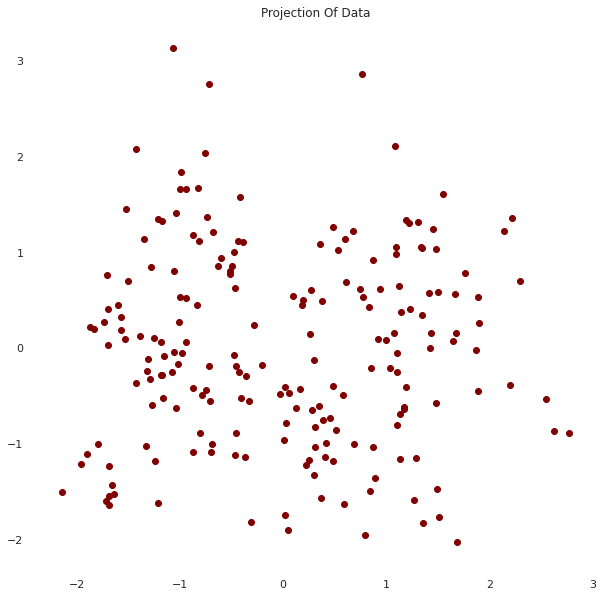

In [131]:
# Тепер поглянемо як виглядають наші данні у зменшеному вимірі на графіку

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(new_data['col1'], new_data['col2'], c='maroon')
fig.patch.set_facecolor('white')

ax.set_title('Projection Of Data')
ax.set_facecolor('white')  

plt.show()

#### *3. Кластеризація*

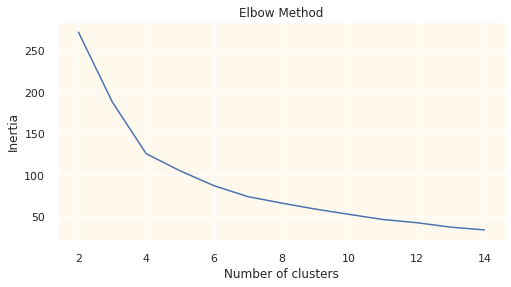

In [162]:
# Використовуємо метод Elbow для визначення оптимальної кількості кластерів

inertias = []
for k in range(2, 15):
    k2 = KMeans(n_init=10, n_clusters=k)
    k2.fit(new_data)
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(8, 4))
pd.Series(inertias, index=range(2, 15)).plot(ax=ax)

plt.title('Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
fig.patch.set_facecolor('white') 

Графік вказує, що оптимальною кількістю кластерів для наших даних буде 4

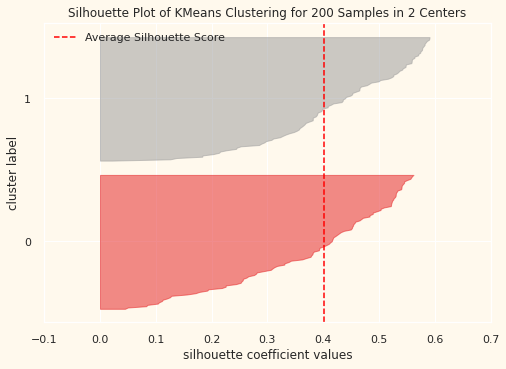

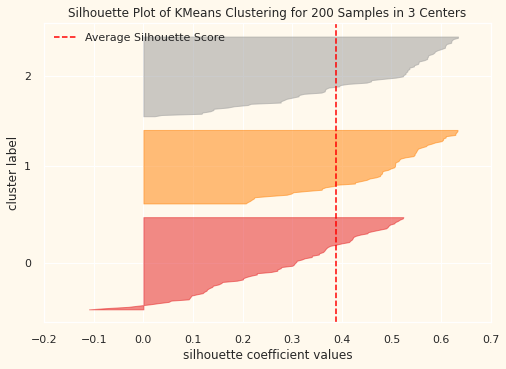

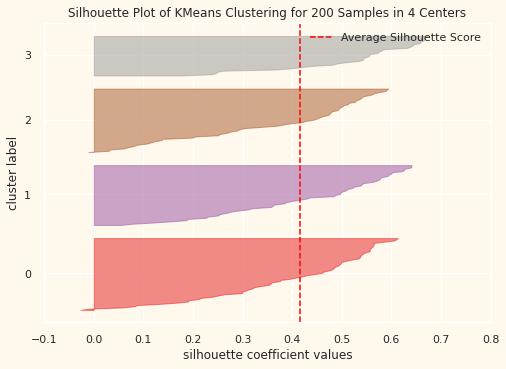

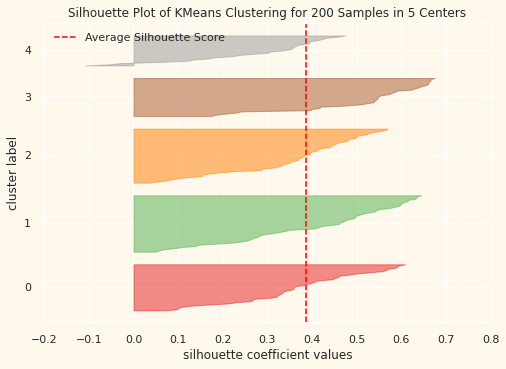

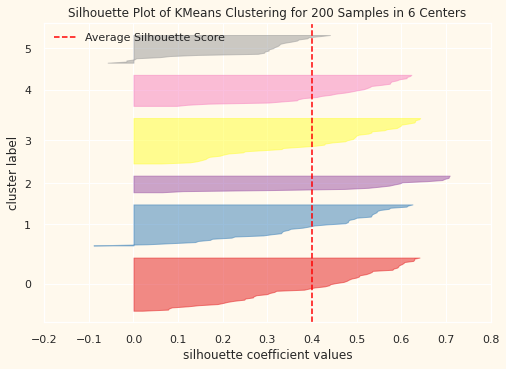

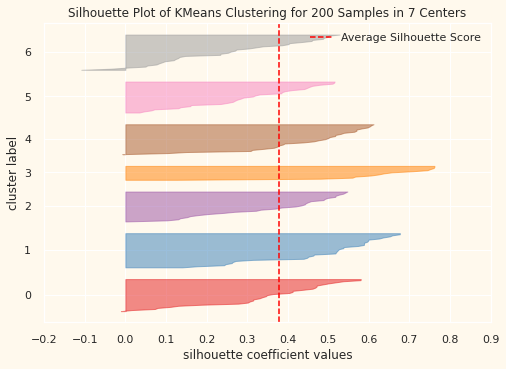

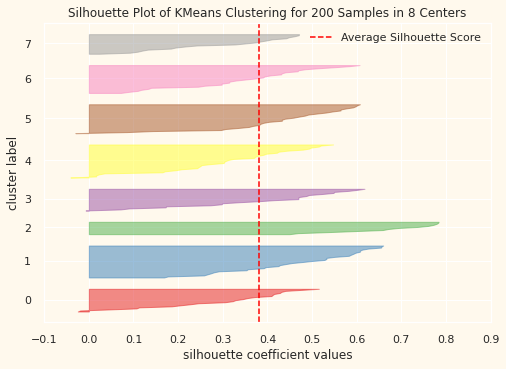

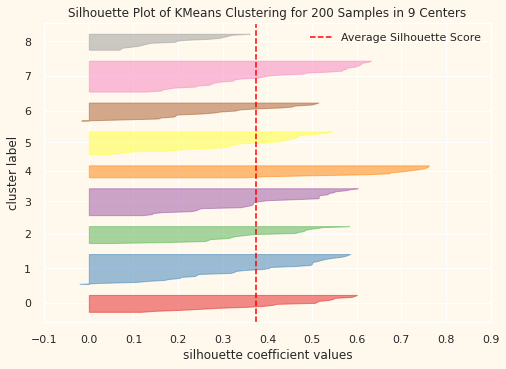

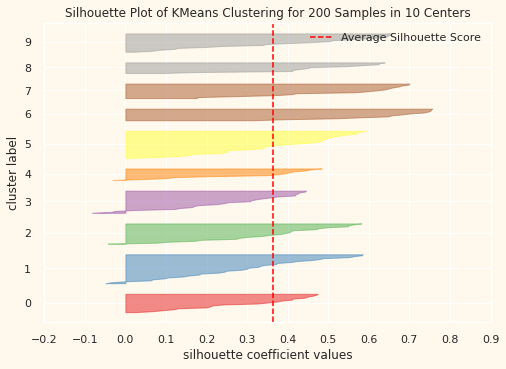

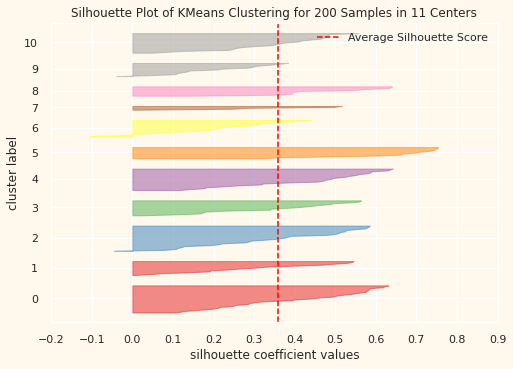

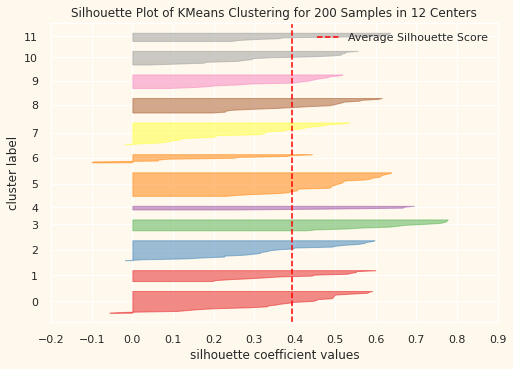

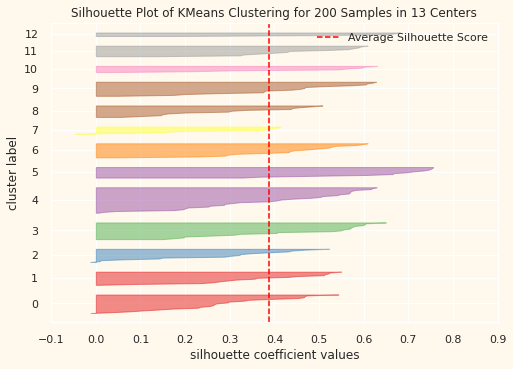

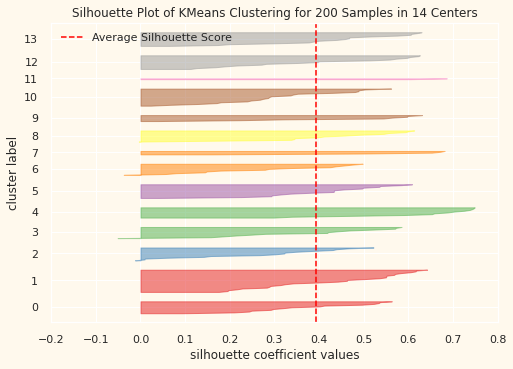

In [119]:
# Використовуємо метод Silhouette score для визначення оптимальної кількості кластерів

for k1 in range(2, 15):

    kmeans = KMeans(n_init=10, n_clusters=k1)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(new_data)
    visualizer.show()

Оптимальною кількістю кластерів є та кількість, при якій середній коефіцієнт силуета максимальний. У нашому випадку це також **4**, оскільки далі при збільшені кластерів не відбувається помітна зміна кооефіціенту

##### Застосовуємо кластеризації

In [163]:
# Реалізовуємо модель KMeans з кількістб кластерів визначених вище

kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(new_data)

labels = kmeans.predict(new_data)

print(labels)

[2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 3 2 1 2 1 2 2 2 1 2 2 3 1 3 1 3 2 3 3 0 1 1 3 0 1 1 0 2 3 1 1 1
 3 0 1 3 2 1 3 3 3 1 2 3 1 2 2 1 1 0 3 1 2 0 1 2 3 0 2 1 3 0 3 2 1 3 3 3 3
 2 1 0 2 2 1 1 1 1 0 1 2 0 2 2 3 0 3 0 3 0 2 2 3 2 1 0 3 2 1 0 2 2 3 0 3 2
 1 0 3 0 1 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


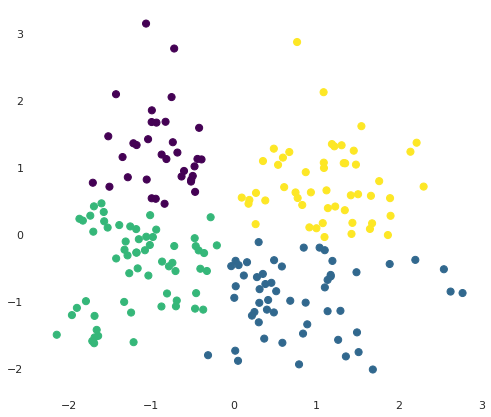

In [168]:
# Візуалізація кластерів
fig, ax= plt.subplots(figsize=(8, 7))

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.scatter(new_data['col1'], new_data['col2'], c=labels, s=50, cmap='viridis')
plt.show()

2. Агломеративний алгоритм

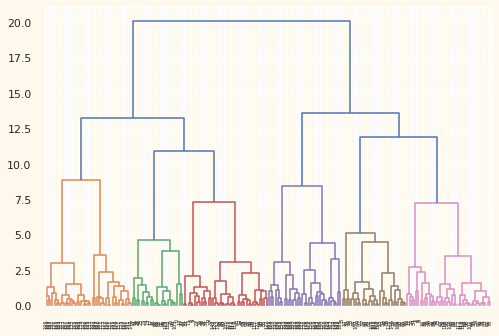

In [192]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(scalet_data,  method='ward')

dendrogram(mergings,
            leaf_rotation=90, color_threshold=10)
plt.show()

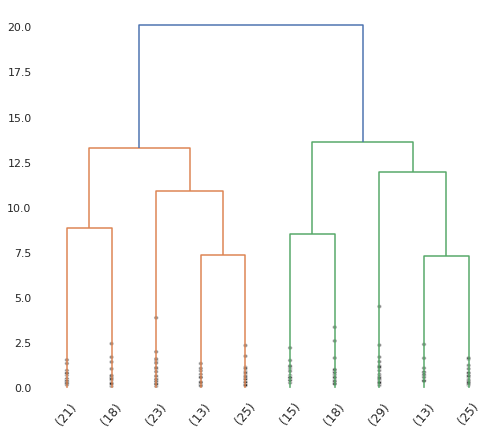

In [204]:
fig, ax= plt.subplots(figsize=(8, 7))

fig.set_facecolor('white')
ax.set_facecolor('white')

dendrogram(mergings,
           truncate_mode='lastp',   
           p=10,  
           leaf_rotation=50,
           show_contracted=True)

plt.show()

In [201]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=10)

y_hc = hc.fit_predict(scalet_data)

from sklearn import metrics

metrics.silhouette_score(scalet_data, y_hc)

0.4176254448686808

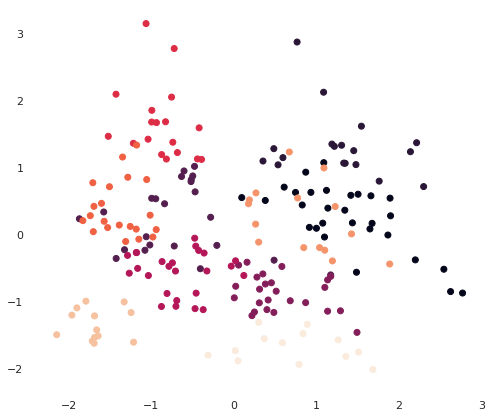

In [206]:
fig, ax= plt.subplots(figsize=(8, 7))

fig.set_facecolor('white')
ax.set_facecolor('white')

plt.scatter(new_data['col1'], new_data['col2'], c=y_hc)
plt.show()

- Опишіть отримані результати

Результати класифікації ми можемо використовувати для визначення групи, до якої належить новий клієнт.
В подальшому ми можемо розробляти різні маркетингові стратегії для кожної групи клієнтів, пропонувати різні знижки чи пропонувати першочерговий доступ до нових товарів для певних груп і т.д 

Для кращих результатів класифікації можна додавати данні про к-сть покупок за певний період часу, данні про середній чек.
Оскільки ми не можемо вважати клієнта який зробив 5 покупок за місяць і клієнта який зробив 1 велику покупку на ту ж сумму, бо у них будуть відмінні мотиви покупок і слід застосовувати різні маркетингові стимули для кожного з них.